

### model 5 - DropOut of 0.01 is added to every convolution layer except last one 

#### Target:

1. Add Regularization, Dropout

#### Results:
Total parameters: 8,694
Best Training Accuracy - 99.24 at the 15th Epoch
Best Testing Accuracy - 99.22 at the 15th epoch

#### Analysis:
1. Good model, Train and test discrepancy is less and seems to be close to zero 
2. The model gap between train and test accuracy has decreased from  0.12 in the previous model to around 0.02
3. Adding dropout has got the test accuracy close to train accuracy, reducing the over fit. hence the accuracy of test has decreased 99.29 in the previous modek to 99.22
4. The train accuracy has also decreased from 99.41 to 99.24. Dropout might be causing underfitting, which might be because of the introduction of noise. 

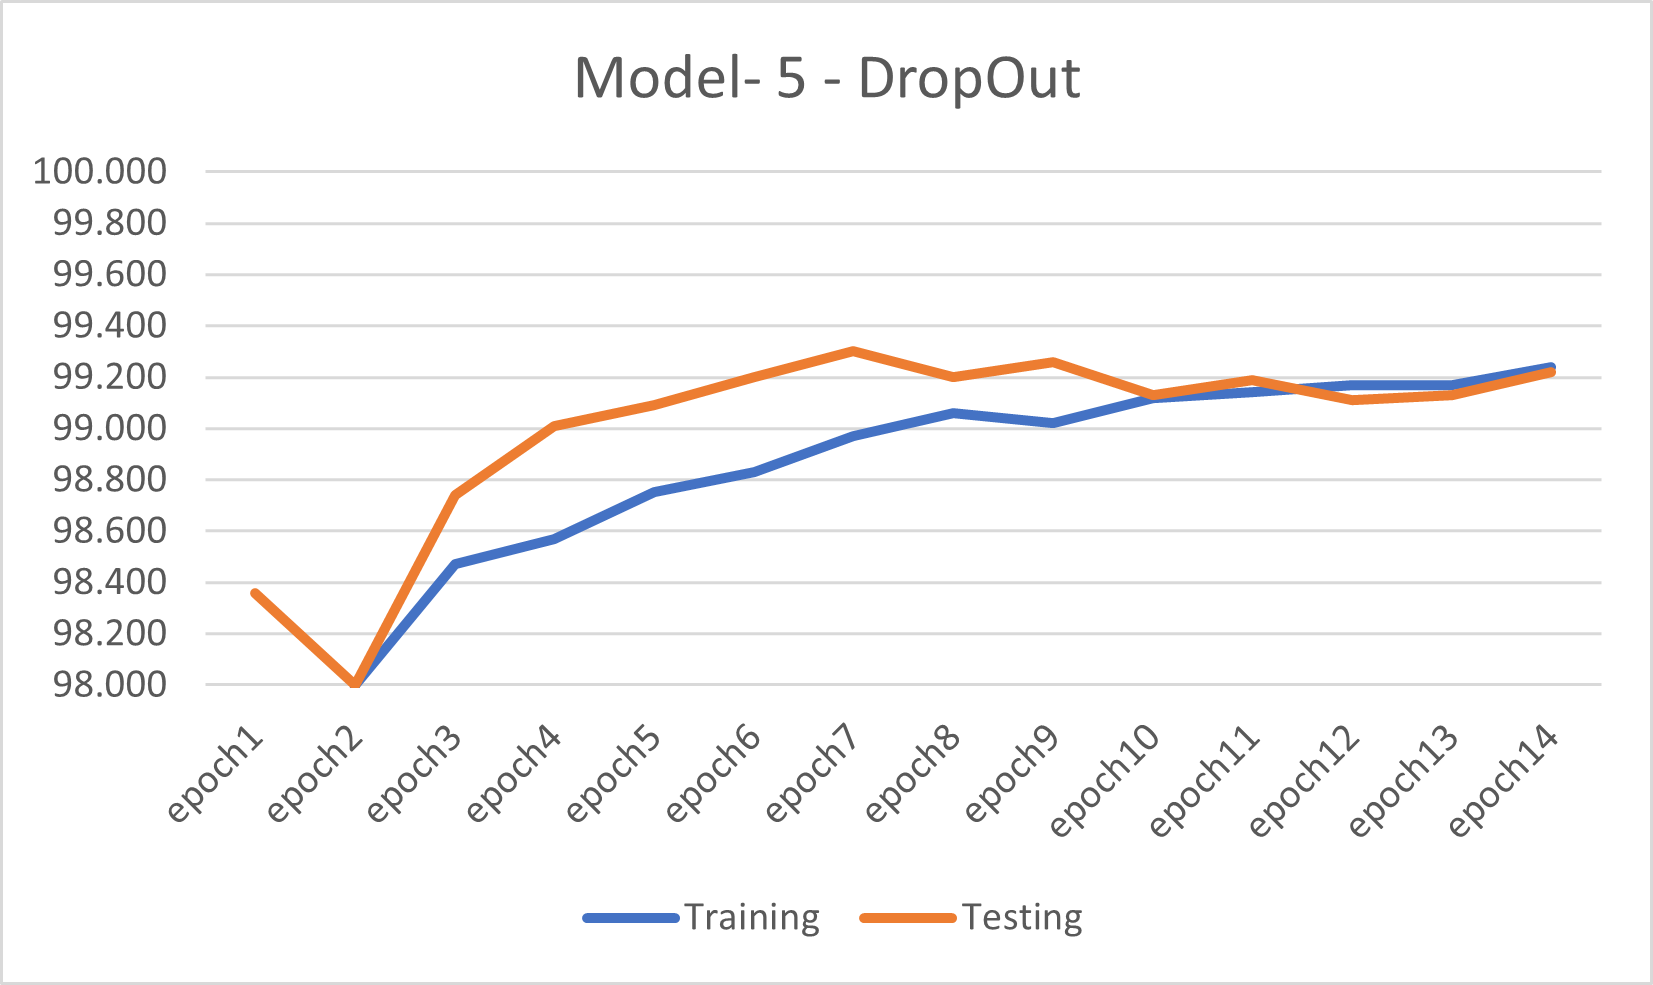

## Import Libraries

In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model5

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train data transformations
train_transformer = [transforms.RandomRotation((-7., 7.), fill=0),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,)),]

# Test Phase transformations
test_transformer = [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [3]:
# sending model to device
model = model5().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,080
       BatchNorm2d-6           [-1, 12, 28, 28]              24
              ReLU-7           [-1, 12, 28, 28]               0
           Dropout-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             120
             ReLU-11           [-1, 10, 14, 14]               0
           Conv2d-12           [-1, 10, 12, 12]             900
      BatchNorm2d-13           [-1, 10, 12, 12]              20
             ReLU-14           [-1, 10,

# Let's Train and test our model

In [4]:
model =  model5().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.15030954778194427 Batch_id=468 Accuracy=94.20: 100%|██████████| 469/469 [00:20<00:00, 22.85it/s]



Test set: Average loss: 0.0542, Accuracy: 9836/10000 (98.36%)

EPOCH: 1


Loss=0.027405038475990295 Batch_id=468 Accuracy=98.00: 100%|██████████| 469/469 [00:22<00:00, 21.29it/s]



Test set: Average loss: 0.0381, Accuracy: 9884/10000 (98.84%)

EPOCH: 2


Loss=0.06742192059755325 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:22<00:00, 21.09it/s]



Test set: Average loss: 0.0405, Accuracy: 9874/10000 (98.74%)

EPOCH: 3


Loss=0.01514426525682211 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:21<00:00, 21.39it/s]



Test set: Average loss: 0.0312, Accuracy: 9901/10000 (99.01%)

EPOCH: 4


Loss=0.02233003079891205 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:22<00:00, 20.86it/s]



Test set: Average loss: 0.0285, Accuracy: 9909/10000 (99.09%)

EPOCH: 5


Loss=0.09336885064840317 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:21<00:00, 21.60it/s]



Test set: Average loss: 0.0286, Accuracy: 9920/10000 (99.20%)

EPOCH: 6


Loss=0.018817685544490814 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:22<00:00, 21.13it/s]



Test set: Average loss: 0.0253, Accuracy: 9914/10000 (99.14%)

EPOCH: 7


Loss=0.06371582299470901 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:22<00:00, 21.27it/s]



Test set: Average loss: 0.0242, Accuracy: 9922/10000 (99.22%)

EPOCH: 8


Loss=0.0068786232732236385 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:21<00:00, 21.58it/s]



Test set: Average loss: 0.0252, Accuracy: 9920/10000 (99.20%)

EPOCH: 9


Loss=0.03351183608174324 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:20<00:00, 22.68it/s]



Test set: Average loss: 0.0572, Accuracy: 9826/10000 (98.26%)

EPOCH: 10


Loss=0.05677172169089317 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:21<00:00, 21.95it/s]



Test set: Average loss: 0.0292, Accuracy: 9913/10000 (99.13%)

EPOCH: 11


Loss=0.017615940421819687 Batch_id=468 Accuracy=99.14: 100%|██████████| 469/469 [00:22<00:00, 21.25it/s]



Test set: Average loss: 0.0243, Accuracy: 9919/10000 (99.19%)

EPOCH: 12


Loss=0.03664683923125267 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:21<00:00, 21.38it/s]



Test set: Average loss: 0.0259, Accuracy: 9911/10000 (99.11%)

EPOCH: 13


Loss=0.013366688042879105 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:21<00:00, 21.55it/s]



Test set: Average loss: 0.0267, Accuracy: 9913/10000 (99.13%)

EPOCH: 14


Loss=0.02309711091220379 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:20<00:00, 22.51it/s]



Test set: Average loss: 0.0244, Accuracy: 9922/10000 (99.22%)



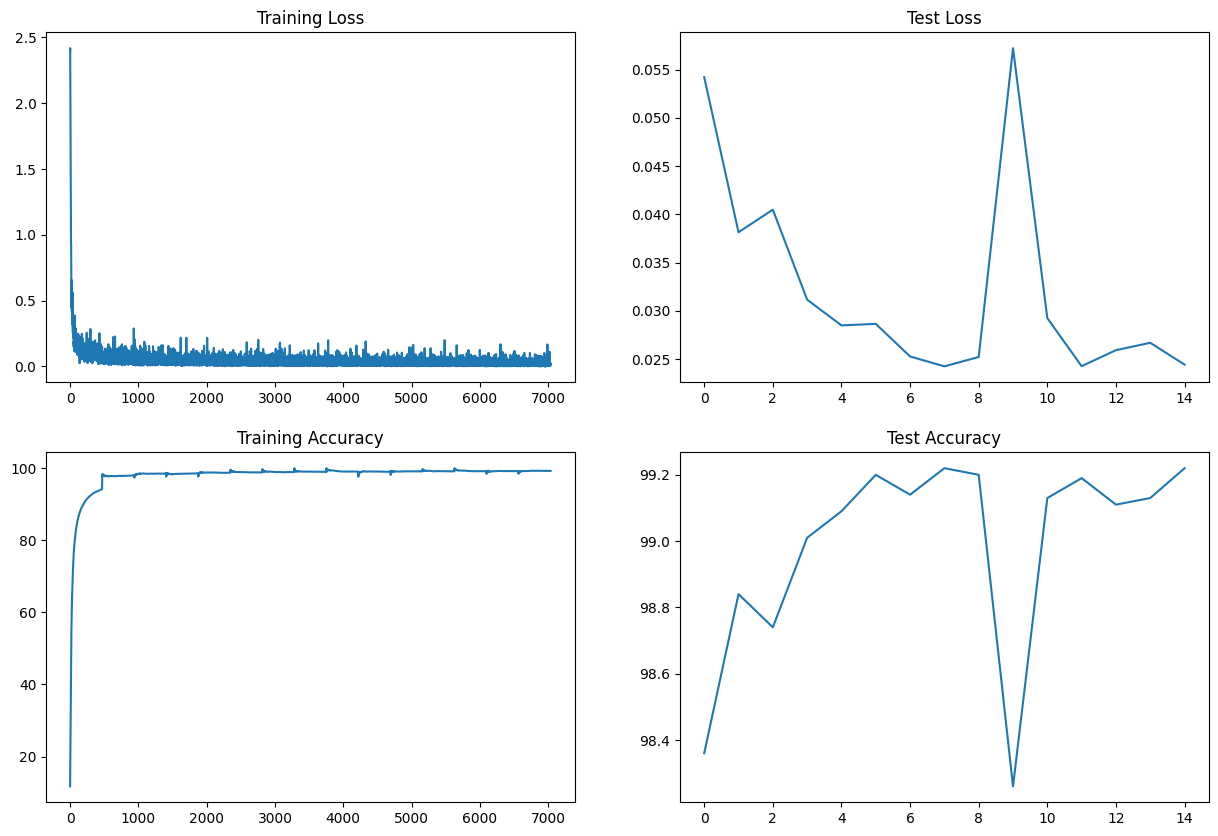

In [5]:
plot_accuracy_loss()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


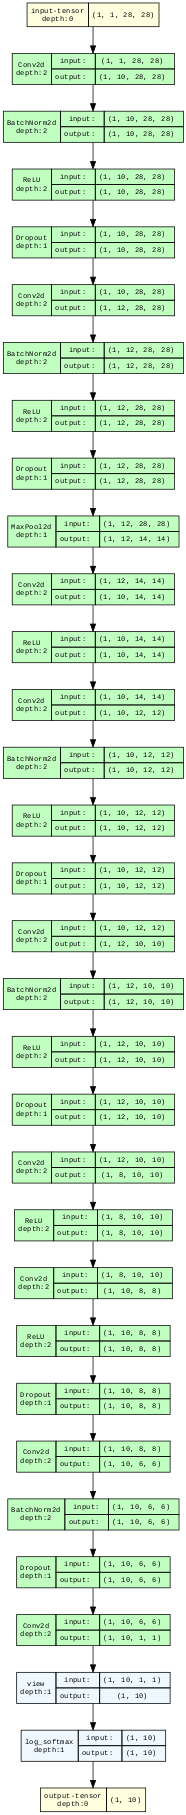

In [6]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model5(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph